In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
import sys
sys.path.append(path) 

In [7]:
path_=  'C:/Users/felipe/Documents/Brain/Models/'
import sys
sys.path.append(path_) 

In [8]:
from xgboost_regressor import XGBoostRegressor
from Plotter import Plotter


In [9]:
import pandas as pd
import numpy as np
import pickle

file_name = 'dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 40
df_filtrado = df[df['Age'] > 40].reset_index(drop=True)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

xgb_model = XGBoostRegressor()
xgb_model.set_data(X,y, preprocess=True)

xgb_model = XGBoostRegressor()
xgb_model.set_data(X,y)
Plotter = Plotter()

In [10]:
with open(f'{path}Opt_Model/opt_XGB_model_40A.pickle', 'rb') as file:
    opt_xgb_40A= pickle.load(file)

In [11]:
errores = opt_xgb_40A.cv_results_['mean_test_score'][:100]

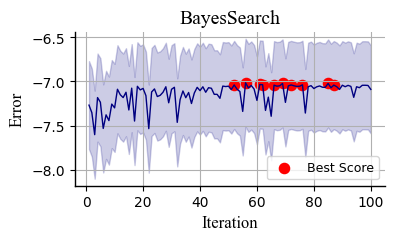

Top 1: Iteration 56, Score -7.014634330670039
Top 2: Iteration 69, Score -7.0224468789345185
Top 3: Iteration 85, Score -7.022498437563579
Top 4: Iteration 61, Score -7.034205054472655
Top 5: Iteration 62, Score -7.03698419411977
Top 6: Iteration 76, Score -7.037619199875072
Top 7: Iteration 52, Score -7.03915003709304
Top 8: Iteration 72, Score -7.039282055053955
Top 9: Iteration 87, Score -7.041247010934048
Top 10: Iteration 66, Score -7.04154234351256


In [12]:
Plotter.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [14]:
best_params_xgb = xgb_model.best_hyper(opt_model=opt_xgb_40A, num_max=100)

In [27]:
best_params_xgb

[{'colsample_bytree': 0.6,
  'learning_rate': 0.031011543328829893,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03371374196724646,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03092947827664299,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.033676334284894124,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.033342393223245836,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03131428589297841,
  'max_depth': 10,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.047263658704671266,
  'max_depth': 9,
  'n_estimators': 50,
  'subsample': 1.0},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.03373686268743549,
  'max_depth': 10,
  'n_est

In [15]:
results, best_model_results, best_model, residual_model = xgb_model.trainer_2(params_=best_params_xgb[0])

In [16]:
with open(f'{path}Opt_Model_2/BestModel_XGB_all_features_40A.pickle', 'wb') as file:
    pickle.dump(xgb_model.model, file)
with open(f'{path}Opt_Model_2/results_XGB_model_all_features_40A.pickle', 'wb') as file:
    pickle.dump(results, file)
with open(f'{path}Opt_Model_2/residual_model_XGB_model_all_features_40A.pickle', 'wb') as file:
    pickle.dump(residual_model, file)

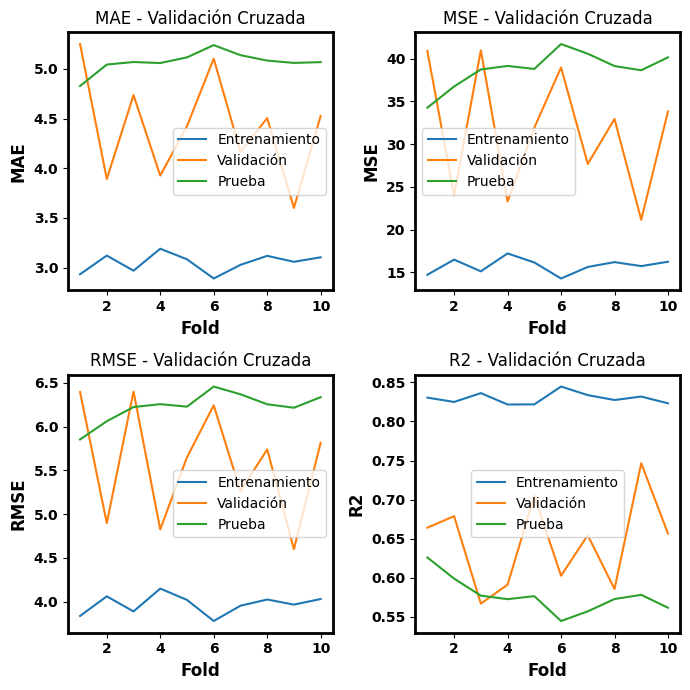

In [17]:
Plotter.plot_metricas_evaluacion(results)

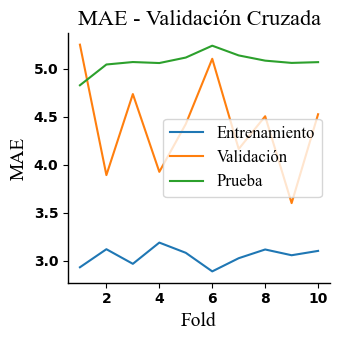

In [18]:
Plotter.plot_metrica_evaluacion(results, font='Times New Roman',mode=2,fontsize=14,x_size=3.5,y_size=3.5 )

In [19]:
y_pred=xgb_model.predicter_corrected_2(X_test= xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     275.8
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           1.22e-36
Time:                        15:09:11   Log-Likelihood:                -421.25
No. Observations:                 162   AIC:                             846.5
Df Residuals:                     160   BIC:                             852.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8198      1.760     20.349      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


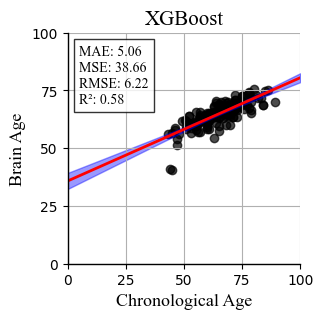

Error medio absoluto: 5.059243875366527
Error cuadrático medio: 38.65543481390099
Raíz del error cuadrático medio: 6.217349500703736
Coeficiente de determinación (R²): 0.5781939247001817


In [20]:
Plotter.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [21]:
shap_values, shap_summary_sorted = xgb_model.feature_importance_shap(X_test=xgb_model.X_test,model=xgb_model.model)

Importancia de características basada en suma de valores SHAP:
High_subj_spec_EPP_HPC_left: 82.58583068847656
IAF_OCC_left: 82.17539978027344
Low_subj_spec_EPP_HPC_left: 59.218833923339844
Low_subj_spec_EPP_OCC_right: 47.51367950439453
High_subj_spec_EPP_CING_right: 47.17716598510742
Low_subj_spec_RPD_PARIET_right: 32.97649002075195
Alpha2_canon_EPP_OCC_right: 32.610260009765625
Low_subj_spec_EPP_OCC_left: 29.423446655273438
Alpha2_canon_EPP_OCC_left: 29.372909545898438
Alpha2_canon_EPP_HPC_right: 28.222726821899414
IAF_INS_right: 28.039194107055664
Low_subj_spec_EPP_PARIET_right: 26.420154571533203
Low_subj_spec_RPD_HPC_right: 25.233612060546875
High_subj_spec_RPD_HPC_left: 24.458053588867188
High_subj_spec_EPP_PARIET_right: 24.441513061523438
Alpha2_canon_EPP_HPC_left: 22.793256759643555
High_subj_spec_RPD_CING_right: 21.33511734008789
High_subj_spec_EPP_OCC_left: 21.135465621948242
TF_SFG_left: 20.84241485595703
Alpha2_canon_RPD_CING_right: 18.944841384887695
Low_subj_spec_RPD_CING_

In [22]:
with open(f'{path}Opt_Model_2/shap_values_xgb_40A.pickle', 'wb') as file:
        pickle.dump(shap_values, file)
with open(f'{path}Opt_Model_2/shap_summary_sorted_xgb_40A.pickle', 'wb') as file:
        pickle.dump(shap_summary_sorted, file)

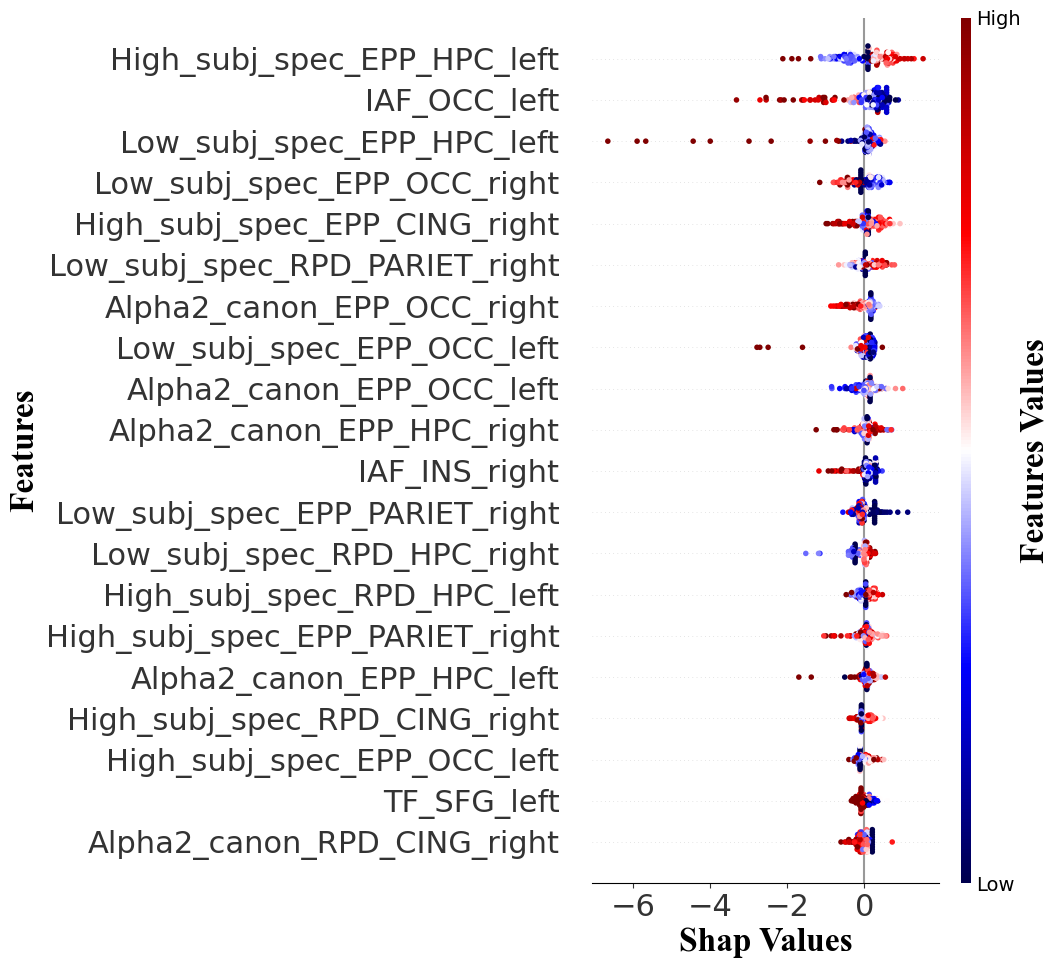

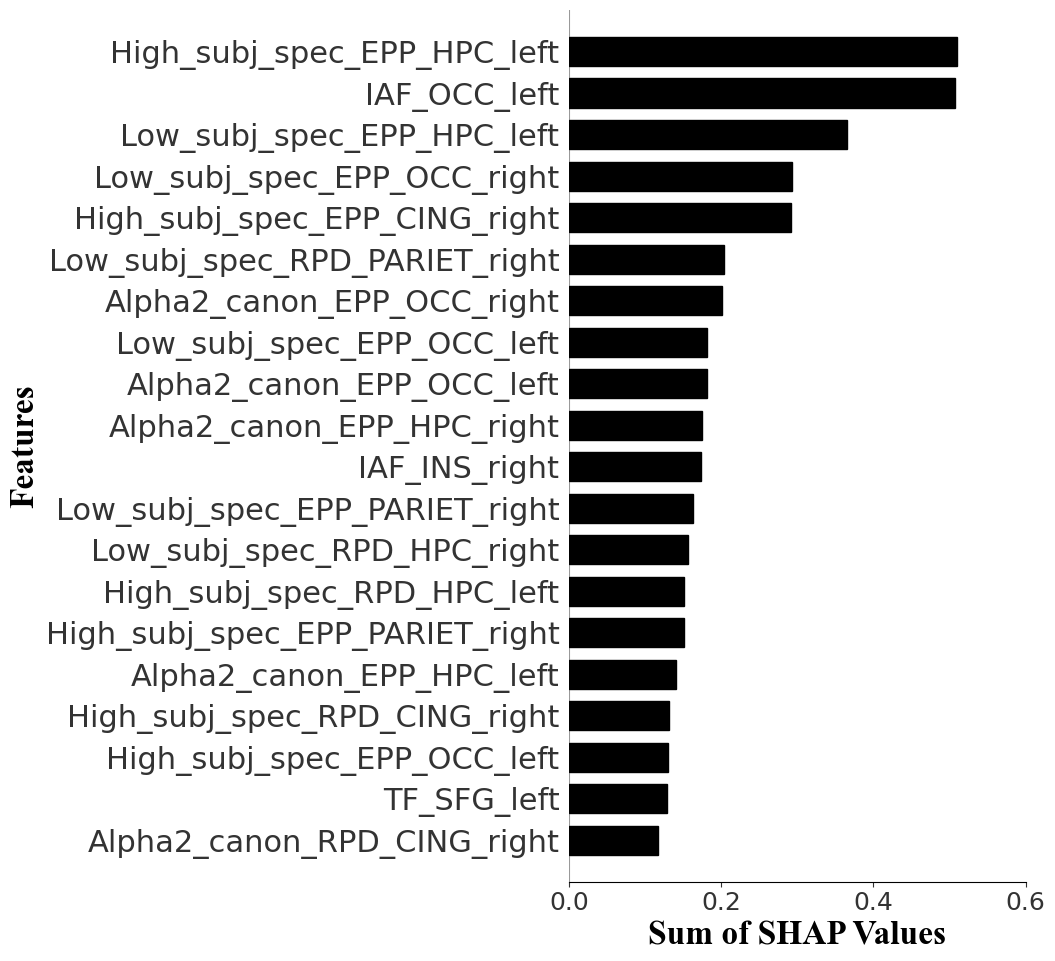

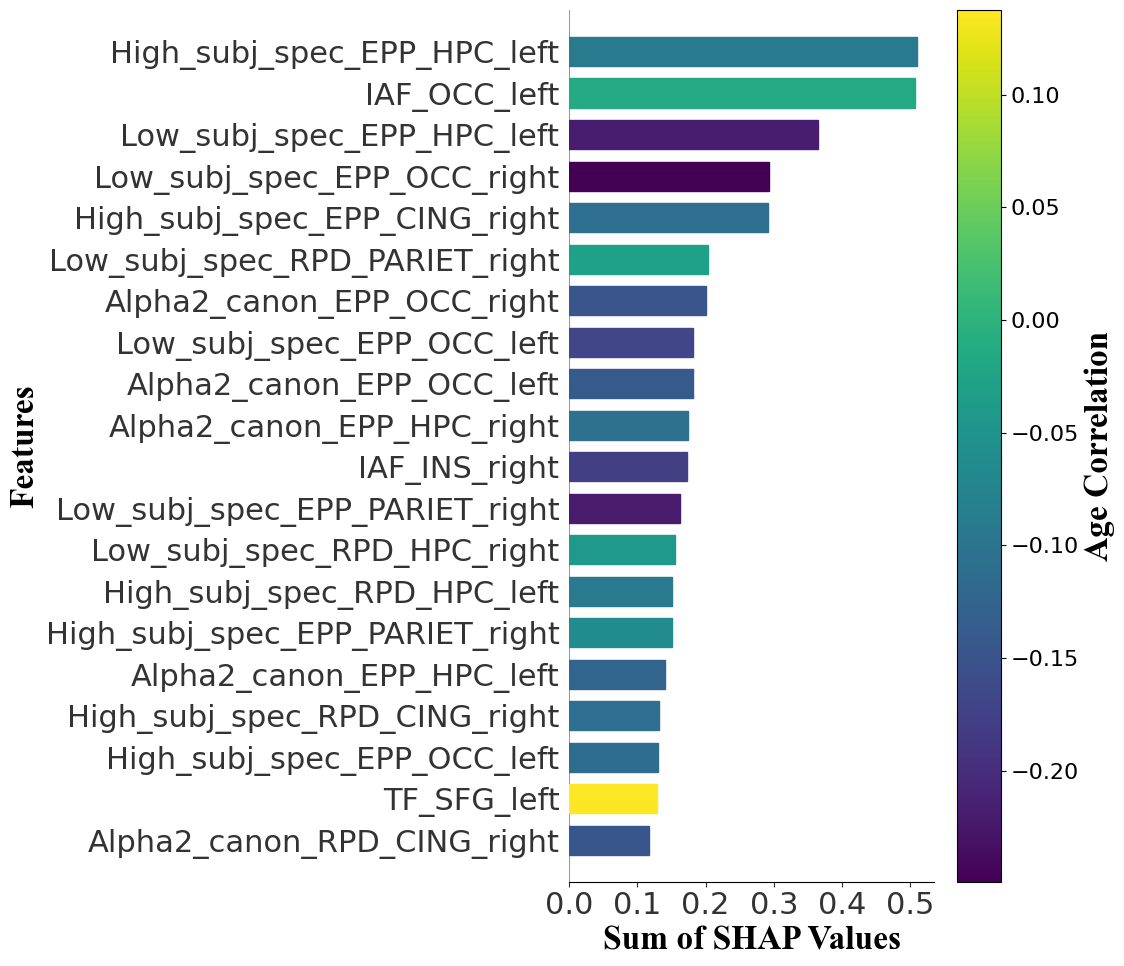

In [23]:
Plotter.plot_feature_importance(shap_values=shap_values,X_test=xgb_model.X_test,y_test=xgb_model.y_test, font= "Times New Roman", fontsize=24, xlabel1='Shap Values', xlabel2='Sum of SHAP Values',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [24]:
shap_por_region_sorted, resultado_normalizado_sorted=xgb_model.shap_region(shap_summary_sorted=shap_summary_sorted, num_max=20)

HPC_left: 1.000000
OCC_left: 0.857456
CING_right: 0.462599
PARIET_right: 0.443457
OCC_right: 0.423811
HPC_right: 0.282754
INS_right: 0.148312
SFG_left: 0.110245


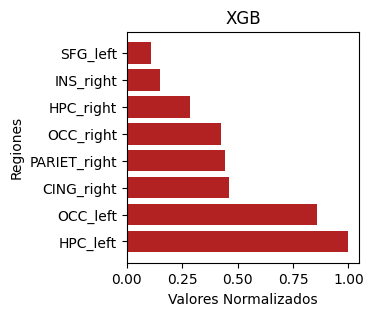

In [25]:
Plotter.plot_normalized_values(resultado_normalizado_sorted, color='firebrick', name_set='XGB',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


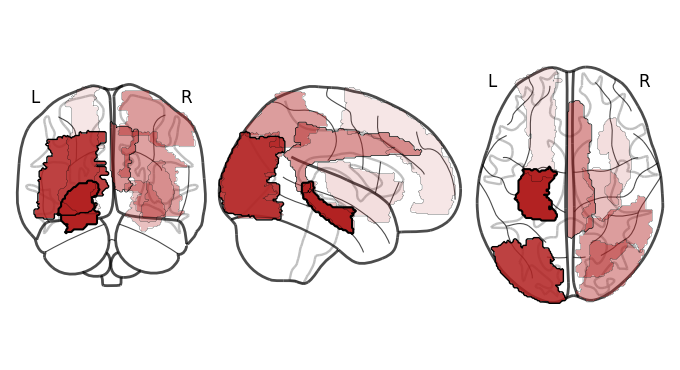

In [26]:
base_path = f'{path}cerebritos/'

Plotter.plot_brain_regions(resultado_normalizado_sorted, base_path, color='firebrick')